## Webscrape data according to the affiliation of Office of Science and Engineering Laboritories

In [17]:
#Import libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime

## Input keyword and URL 2004 - 2023

In [21]:
# What keyword would I like to search? (Office of Science and Engineering Laboratories[affil])
keyword = '(Office%20of%20Science%20and%20Engineering%20Laboratories%5Baffil%5D)'

# For the website I'm checking, what is the base URL for the page where results come up?
baseURL = 'https://pubmed.ncbi.nlm.nih.gov/?term='

# Build the URL
searchURL = baseURL + keyword
print(searchURL)

# Send an HTTP request (internet browser asks server for info needed to load the website), save the results in 'response'
response = requests.get(searchURL).content
#print(response)

# Interpret response.content with Beautifhttps://pubmed.ncbi.nlm.nih.gov/?term=(OfficeulSoup
content = BeautifulSoup(response, 'lxml') #lxml = library to parse HTML and other languages
print(content)

https://pubmed.ncbi.nlm.nih.gov/?term=(Office%20of%20Science%20and%20Engineering%20Laboratories%5Baffil%5D)
<!DOCTYPE html>
<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/f2844161-47dd-4842-a70e-8cfe4bd7b9a6/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/f2844161-47dd-4842-a70e-8cfe4bd7b9a6/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<lin

In [25]:
# Find ONE article
article_content = content.find('article', class_ = 'full-docsum')
#print(article_content)

#Extract title
title = article_content.find('a', class_ = 'docsum-title').text.strip()
print(title)

# Extract other citation info
authors = article_content.find('span', class_ = 'docsum-authors full-authors').text.strip()
print(authors)

journal = article_content.find('span', class_ = 'docsum-journal-citation full-journal-citation').text.strip()
print(journal)

pmid = article_content.find('span', class_ = 'citation-part').text.strip()
print(pmid)

Aseptic and septic prosthetic joint loosening: Impact of biomaterial wear on immune cell function, inflammation, and infection.
Hodges NA, Sussman EM, Stegemann JP.
Biomaterials. 2021 Nov;278:121127. doi: 10.1016/j.biomaterials.2021.121127. Epub 2021 Sep 9.
PMID: 34564034


## Get citation code

In [26]:
# Assemble full citation string
full_citation = authors + ' ' + title + ' ' + journal + ' ' + pmid
print(full_citation)

Hodges NA, Sussman EM, Stegemann JP. Aseptic and septic prosthetic joint loosening: Impact of biomaterial wear on immune cell function, inflammation, and infection. Biomaterials. 2021 Nov;278:121127. doi: 10.1016/j.biomaterials.2021.121127. Epub 2021 Sep 9. PMID: 34564034


## Get citations for all articles in the search results

In [71]:
# How many pages of results are there? #
total_pages = content.find('label', class_ = 'of-total-pages').text.strip()
#print(total_pages)

# Extract the number of pages
p = total_pages.split(' ')
#print(p)

numPages = int(p[1])
#print(numPages)


### Loop through each page ###

# Base URL for multiple pages
pageURL = searchURL + '&page='
print(pageURL)

# Loop through each page and extract the information
citation = []
titles = []
#years = [] # added

count = 1
while count < (numPages + 1):
    # link to the page we're on
    page = pageURL + str(count)
    print(page)
    
    # Collect response from that page
    response = requests.get(page)

    # Interpret response.content with BeautifulSoup
    content = BeautifulSoup(response.content, 'lxml')
    
    # Find ALL articles on this page
    articles = content.find_all('article', class_ = 'full-docsum')
    
    # Iterate through the list of articles
    for article in articles:
        title = article.find('a', class_ = 'docsum-title').text.strip()
        citation = article.find('div', class_ = 'docsum-citation full-citation')
        authors = citation.find('span', class_ = 'docsum-authors full-authors').text
        journal = citation.find('span', class_ = 'docsum-journal-citation full-journal-citation').text
        pmid = citation.find('span', class_ = 'citation-part').text
        #year_string = article.find('span', class_ ='docsum-journal-citation full-journal-citation').text.strip () #added
        #date = datetime.datetime.strptime(year_string, "%Y-%m-%d") # datetime added
        #year = date.strftime("%Y") 
        full_citation = authors + ' ' + title + ' ' + journal + ' ' + pmid
        
    
    
        citations.append(full_citation)
        titles.append(title)
    
    
    
    count += 1
    
print('Finished')
print(citations)
print(titles)


https://pubmed.ncbi.nlm.nih.gov/?term=(Office%20of%20Science%20and%20Engineering%20Laboratories%5Baffil%5D)&page=
https://pubmed.ncbi.nlm.nih.gov/?term=(Office%20of%20Science%20and%20Engineering%20Laboratories%5Baffil%5D)&page=1
https://pubmed.ncbi.nlm.nih.gov/?term=(Office%20of%20Science%20and%20Engineering%20Laboratories%5Baffil%5D)&page=2
https://pubmed.ncbi.nlm.nih.gov/?term=(Office%20of%20Science%20and%20Engineering%20Laboratories%5Baffil%5D)&page=3
https://pubmed.ncbi.nlm.nih.gov/?term=(Office%20of%20Science%20and%20Engineering%20Laboratories%5Baffil%5D)&page=4
https://pubmed.ncbi.nlm.nih.gov/?term=(Office%20of%20Science%20and%20Engineering%20Laboratories%5Baffil%5D)&page=5
https://pubmed.ncbi.nlm.nih.gov/?term=(Office%20of%20Science%20and%20Engineering%20Laboratories%5Baffil%5D)&page=6
https://pubmed.ncbi.nlm.nih.gov/?term=(Office%20of%20Science%20and%20Engineering%20Laboratories%5Baffil%5D)&page=7
https://pubmed.ncbi.nlm.nih.gov/?term=(Office%20of%20Science%20and%20Engineering%

In [64]:
# Pair each title with its citation
results = list( zip(titles, citations) )

# Data frame
df = pd.DataFrame(results, columns = ['Title', 'Citation'])

# Save file
df.to_csv('OSEL_Affil_Search.csv')


## check for duplicates and make a new excel file

In [40]:
# Read the CSV files
osel_df = pd.read_csv('OSEL_Affil_Search.csv')
fda_df = pd.read_excel('Inputs Refined - Updated.xlsx', 'Publications')

In [43]:
duplicate_articles = osel_df[osel_df['Title'].isin(fda_df['Publication Title'])]
duplicate_articles

,Unnamed: 0,Title,Citation


In [52]:
new_df = pd.DataFrame()
new_df['Publication Titles'] = pd.concat([fda_df['Publication Title'], osel_df['Title']], ignore_index=True)

In [54]:
new_df['references'] = pd.concat([fda_df['Reference '], osel_df['Citation']], ignore_index=True)

In [57]:
# Add the additional columns from the FDA dataset
for column in fda_df.columns:
    if column not in ['Publication Title', 'Reference ']:
        new_df[column] = fda_df[column]

In [58]:
new_df.to_excel('inputs_re-refined.xlsx', index=False, sheet_name='Publications')

## Code to Webscrape Year

In [80]:
import pandas as pd

# Read the CSV file
csv_data = pd.read_csv('csv-OfficeofSc-set.csv')

# Read the Excel sheet
excel_data = pd.read_excel('inputs_re-refined.xlsx')

In [ ]:
# remove the period after each publication title
excel_data['Publication Titles'] = excel_data['Publication Titles'].str.rstrip('.')

In [86]:
merged_data = pd.merge(excel_data, csv_data[['Title', 'Publication Year']], left_on='Publication Titles', right_on='Title', how='left')

In [90]:
# turn all nas into 0, so all values can be int
merged_data['Publication Year'] = merged_data['Publication Year'].fillna(0).astype(int)

In [91]:
# remove the 0 after the year
merged_data['Publication Year'] = merged_data['Publication Year'].astype(int).astype(str).str.rstrip('.0')

In [93]:
merged_data.tail()

,Publication Titles,references,Link,Affiliation of OSEL,Number of Unique Submissions,Unique Procodes,Program,Division,Source of Publication Title (Name of Scientist),Search Phrase/Keyword,PublishDate,Title,Publication Year
698,Common Genetic Variant Risk Score Is Associate...,"Garcia V, Elfer K, Peeters DJE, Ehinger A, Wer...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Common Genetic Variant Risk Score Is Associate...,2017
699,Scoring of tumor-infiltrating lymphocytes: Fro...,"Barr RG, Ferraioli G, Palmeri ML, Goodman ZD, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Scoring of tumor-infiltrating lymphocytes: Fro...,2018
700,"Evolving Applications, Technological Challenge...","Kazemzadeh-Narbat M, Cheng H, Chabok R, Alvare...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,"Evolving Applications, Technological Challenge...",2018
701,2018 international consensus meeting on muscul...,"Gavrielides MA, Ronnett BM, Vang R, Barak S, L...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2018 international consensus meeting on muscul...,2019
702,Pitfalls in assessing stromal tumor infiltrati...,"Pool KL, Heuvelings CC, Bélard S, Grobusch MP,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Pitfalls in assessing stromal tumor infiltrati...,202


In [96]:
merged_data.to_excel('inputs_re-refined101.xlsx', index=False)

## Check what other affiliations we can search for 

In [149]:
data = pd.read_excel('inputs_re-refined101.xlsx')

In [104]:
freq_table = data['Affiliation of OSEL'].value_counts()
freq_table

not fda                                                                                                                                                                                35
Center for Devices and Radiological Health                                                                                                                                             24
U.S. Food and Drug Administration, Center for Devices and Radiological Health, Office of Science and Engineering Laboratories, Division of Applied Mechanics                            4
Division of Imaging and Applied Mathematics, Office of Science and Engineering Laboratories, Center for Devices and Radiological Health                                                 3
Office of Science and Engineering Laboratories, Center for Devices and Radiological Health                                                                                              3
Center for Devices and Radiological Health, U.S. Food and Drug Adminis

## Clean affiliation search and filter them accordingly

In [150]:
# ensure that the information associated with Division of applied mechanics is now grouped under one group
data['Affiliation of OSEL'] = data['Affiliation of OSEL'].replace('Division of Applied Mechanics, Office of Science and Engineering Laboratories, Center for Devices and Radiological Health', 'Division of Applied Mechanics, Center for Devices and Radiological Health, Food and Drug Administration')

In [151]:
# ensure that the information associated with Division of applied mechanics is now grouped under one group
data['Affiliation of OSEL'] = data['Affiliation of OSEL'].replace('Center for Devices and Radiological Health, Office of Science and Engineering Laboratories, Division of Applied Mechanics', 'Division of Applied Mechanics, Center for Devices and Radiological Health, Food and Drug Administration')

In [152]:
# ensure that the information associated with Division of applied mechanics is now grouped under one group
data['Affiliation of OSEL'] = data['Affiliation of OSEL'].replace('Center for Devices and Radiological Health, Office of Science and Engineering Laboratories, Division of Applied Mechanics', 'Division of Applied Mechanics, Center for Devices and Radiological Health, Food and Drug Administration')

In [153]:
# ensure that the information associated with Division of Imaging and Applied Mathematics is now grouped under one group
data['Affiliation of OSEL'] = data['Affiliation of OSEL'].replace('Division of Imaging and Applied Mathematics, Office of Science and Engineering Laboratories, Center for Devices and Radiological Health', 'Division of Imaging and Applied Mathematics, Center for Devices and Radiological Health')


In [154]:
# ensure that the information associated with Division of Biomedical Physics is now grouped under one group
data['Affiliation of OSEL'] = data['Affiliation of OSEL'].replace('Division of Biomedical Physics, Office of Science and Engineering Laboratories, Center for Devices and Radiological Health', 'Division of Biomedical Physics, Office of Science and Engineering Laboratories')

In [160]:
# ensure that the information associated with DBCMS is now grouped under one group
data['Affiliation of OSEL'] = data['Affiliation of OSEL'].replace('Division of Biology, Chemistry and Materials Science, Office of Science and Engineering Laboratories, Center for Devices and Radiological Health', 'CDRH/OSEL DBCMS')

data['Affiliation of OSEL'] = data['Affiliation of OSEL'].replace('Division of Biology, Chemistry and Materials Science, Office of Science and Engineering Laboratories, Center for Devices and Radiological Health', 'CDRH/OSEL DBCMS')

In [156]:
# ensure that the information associated with DBCMS is now grouped under one group
data['Affiliation of OSEL'] = data['Affiliation of OSEL'].replace('Center for Devices and Radiological Health, Office of Science and Engineering Laboratories, Division of Biology, Chemistry, and Materials Science', 'CDRH/OSEL DBCMS')

In [157]:
# ensure that the information associated with Division of Imaging, Diagnostics, and Software Reliability is now grouped under one group
data['Affiliation of OSEL'] = data['Affiliation of OSEL'].replace('Division of Imaging, Diagnostics, and Software Reliability, Office of Science and Engineering Laboratories, CDRH, FDA', 'Division of Imaging, Diagnostics, and Software Reliability, OSEL/CDRH')
data['Affiliation of OSEL'] = data['Affiliation of OSEL'].replace('Division of Imaging, Diagnostics, and Software Reliability, Center for Devices and Radiological Health', 'Division of Imaging, Diagnostics, and Software Reliability, OSEL/CDRH')

In [158]:
# ensure that the information associated with Division of Imaging, Diagnostics, and Software Reliability is now grouped under one group
data['Affiliation of OSEL'] = data['Affiliation of OSEL'].replace('Center for Devices & Radiological Health', 'Center for Devices and Radiological Health')

## Affiliations and its counts

In [169]:
import pandas as pd

frequency_table = data['Affiliation of OSEL'].value_counts()
table_format = pd.DataFrame({'Affiliation': frequency_table.index, 'Count': frequency_table.values})

print(table_format)

                                          Affiliation  Count
0          Center for Devices and Radiological Health     38
1                                             not fda     35
2   Division of Applied Mechanics, Center for Devi...      9
3                        Food and Drug Administration      4
4   Division of Imaging and Applied Mathematics, C...      4
5                                     CDRH/OSEL DBCMS      3
6   Division of Imaging, Diagnostics, and Software...      3
7   Division of Biomedical Physics, Office of Scie...      2
8   Optical Diagnostic Devices Laboratory, Center ...      1
9   Division of Physics, Office of Science and Eng...      1
10  Division of Biology, Chemistry, and Materials ...      1
11  Division of Biology; Office of Science and Eng...      1


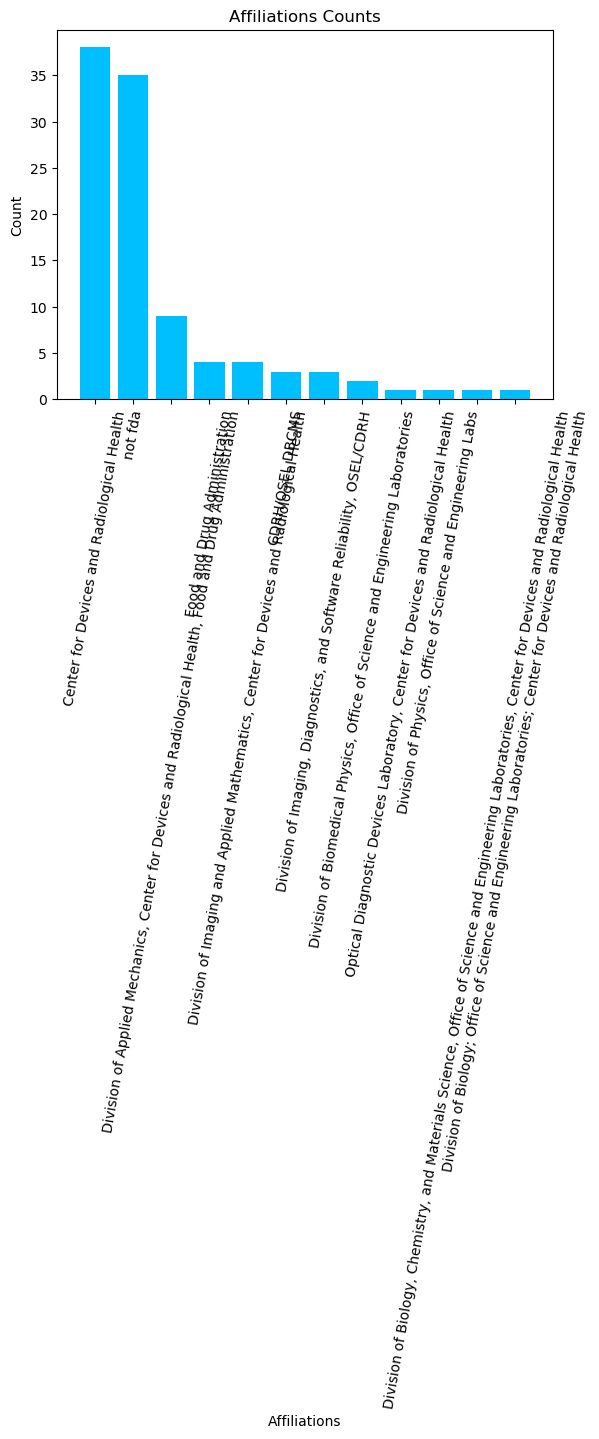

In [167]:
import matplotlib.pyplot as plt
division_counts = data['Affiliation of OSEL'].value_counts()

plt.bar(division_counts.index, division_counts.values, color='#00BFFF')
plt.xlabel('Affiliations')
plt.ylabel('Count')
plt.title('Affiliations Counts')
plt.xticks(rotation=80)
plt.show()